# Business Problem
An insurance company wants to improve its cash flow forecasting by better predicting patient charges using demographic and basic patient health risk metrics at the time of hospitalization.

## PyCaret
PyCaret is an open source, low-code machine learning library in Python to train and deploy machine learning pipelines and models in production. PyCaret can be installed easily using pip as shown below.


In [ ]:
!pip install pycaret


     |████████████████████████████████| 256kB 15.5MB/s 
     |████████████████████████████████| 1.8MB 43.7MB/s 
     |████████████████████████████████| 65.8MB 49kB/s 
     |████████████████████████████████| 1.7MB 47.1MB/s 
     |████████████████████████████████| 14.2MB 254kB/s 
     |████████████████████████████████| 157.5MB 78kB/s 
     |████████████████████████████████| 174kB 60.9MB/s 
     |████████████████████████████████| 6.8MB 12.6MB/s 
     |████████████████████████████████| 245kB 61.9MB/s 
     |████████████████████████████████| 276kB 55.8MB/s 
     |████████████████████████████████| 102kB 15.7MB/s 
     |████████████████████████████████| 81kB 13.3MB/s 
     |████████████████████████████████| 153kB 61.0MB/s 
     |████████████████████████████████| 348kB 63.5MB/s 
     |████████████████████████████████| 163kB 52.9MB/s 
     |████████████████████████████████| 61kB 11.1MB/s 
     |████████████████████████████████| 1.1MB 46.4MB/s 
     |████████████████████████████████| 604kB 56.2M

## Load data from PyCaret’s repository

Load the open source datasets insurance dataset hosted by PyCaret. These are hosted on PyCaret’s github and can also be directly loaded using pycaret datasets module.

In [ ]:
from pycaret.datasets import get_data
data = get_data('insurance') 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Set preprocessing tasks such as scaling and normalization, automatic feature engineering and binning continuous data into intervals. The transformed dataset has 55 features for training derived from only 7 features in the original dataset. All of the new features are the result of transformations and automatic feature engineering in PyCaret.

In [ ]:
from pycaret.regression import *

r2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True,
           feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])


,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 57)"


Sample code for model training and validation in PyCaret using linear regression.

In [ ]:
# Model Training and Validation 
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3036.0027,2.143462e+07,4629.7534,0.8720,0.3896,0.3137
1,3486.8723,3.270450e+07,5718.7847,0.8098,0.4405,0.3345
2,3034.7471,2.337602e+07,4834.8755,0.7040,0.5614,0.4033
3,2899.4216,1.940902e+07,4405.5664,0.8379,0.4674,0.3893
4,3234.3174,2.714745e+07,5210.3213,0.7981,0.4538,0.3108
5,3436.4258,2.675808e+07,5172.8213,0.8279,0.4876,0.3124
6,2939.4294,2.508074e+07,5008.0674,0.8293,0.3771,0.3151
7,3551.7922,3.083264e+07,5552.7144,0.8305,0.4757,0.3165
8,3132.7239,2.292745e+07,4788.2622,0.8519,0.3998,0.3320
9,3295.1824,2.914138e+07,5398.2754,0.8123,0.5079,0.3647


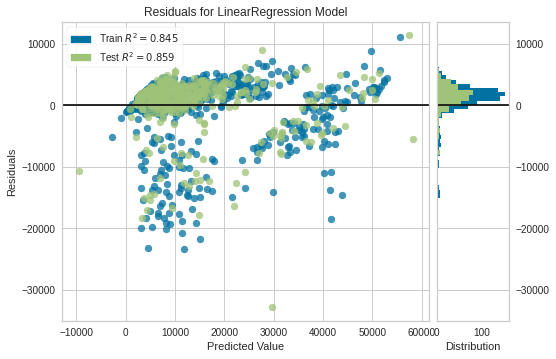

In [ ]:
# plot residuals of trained model
plot_model(lr, plot = 'residuals')

At this stage, the model is still only an object within the notebook. Next, save the model as a file in Google Drive that can be transferred and consumed by other applications.

In [ ]:
# save transformation pipeline and model 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
model_dir = '/content/drive/My Drive/Colab Notebooks/Insurance Company Model/'
os.makedirs(model_dir, exist_ok=True)

In [ ]:
save_model(lr, model_dir + 'deployment_28042020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              random_state=123, subclass='binary',
                              target='charges',
         

When a model is saved in PyCaret, the entire transformation pipeline based on the configuration defined in the setup() function is created . All inter-dependencies are orchestrated automatically. The first task of training a model for development has been finished
